In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
from datetime import datetime
from pandas import DataFrame, Series
from datetime import datetime
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score




In [2]:
train_df = pd.read_csv('C:/Users/Kim Eun ho/Desktop/sooktat/프로젝트/train_merge_data.csv')
train_df.head()

,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,locale,...,city,state,type_y,cluster,Year,Month,Weekend,Weekday,trend,NewYearsDay
0,0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Holiday,National,...,Quito,Pichincha,D,13,2013,1,0,1,0,True
1,1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Holiday,National,...,Quito,Pichincha,D,13,2013,1,0,1,0,True
2,2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Holiday,National,...,Quito,Pichincha,D,13,2013,1,0,1,0,True
3,3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Holiday,National,...,Quito,Pichincha,D,13,2013,1,0,1,0,True
4,4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Holiday,National,...,Quito,Pichincha,D,13,2013,1,0,1,0,True


In [3]:
test_df = pd.read_csv('C:/Users/Kim Eun ho/Desktop/sooktat/프로젝트/test_merge_data.csv')
test_df.head()

,Unnamed: 0,id,date,store_nbr,family,onpromotion,dcoilwtico,type_x,locale,locale_name,...,city,state,type_y,cluster,Year,Month,Weekend,Weekday,trend,NewYearsDay
0,0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.8,Empty,Empty,Empty,...,Quito,Pichincha,D,13,2017,8,0,2,1688,False
1,1,3000889,2017-08-16,1,BABY CARE,0,46.8,Empty,Empty,Empty,...,Quito,Pichincha,D,13,2017,8,0,2,1688,False
2,2,3000890,2017-08-16,1,BEAUTY,2,46.8,Empty,Empty,Empty,...,Quito,Pichincha,D,13,2017,8,0,2,1688,False
3,3,3000891,2017-08-16,1,BEVERAGES,20,46.8,Empty,Empty,Empty,...,Quito,Pichincha,D,13,2017,8,0,2,1688,False
4,4,3000892,2017-08-16,1,BOOKS,0,46.8,Empty,Empty,Empty,...,Quito,Pichincha,D,13,2017,8,0,2,1688,False


In [4]:
train_df.isnull().sum()

Unnamed: 0      0
id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
dcoilwtico      0
type_x          0
locale          0
locale_name     0
description     0
transferred     0
transactions    0
city            0
state           0
type_y          0
cluster         0
Year            0
Month           0
Weekend         0
Weekday         0
trend           0
NewYearsDay     0
dtype: int64

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'store_nbr'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'onpromotion'}>,
        <AxesSubplot:title={'center':'dcoilwtico'}>,
        <AxesSubplot:title={'center':'transactions'}>,
        <AxesSubplot:title={'center':'cluster'}>],
       [<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Weekend'}>,
        <AxesSubplot:title={'center':'Weekday'}>],
       [<AxesSubplot:title={'center':'trend'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

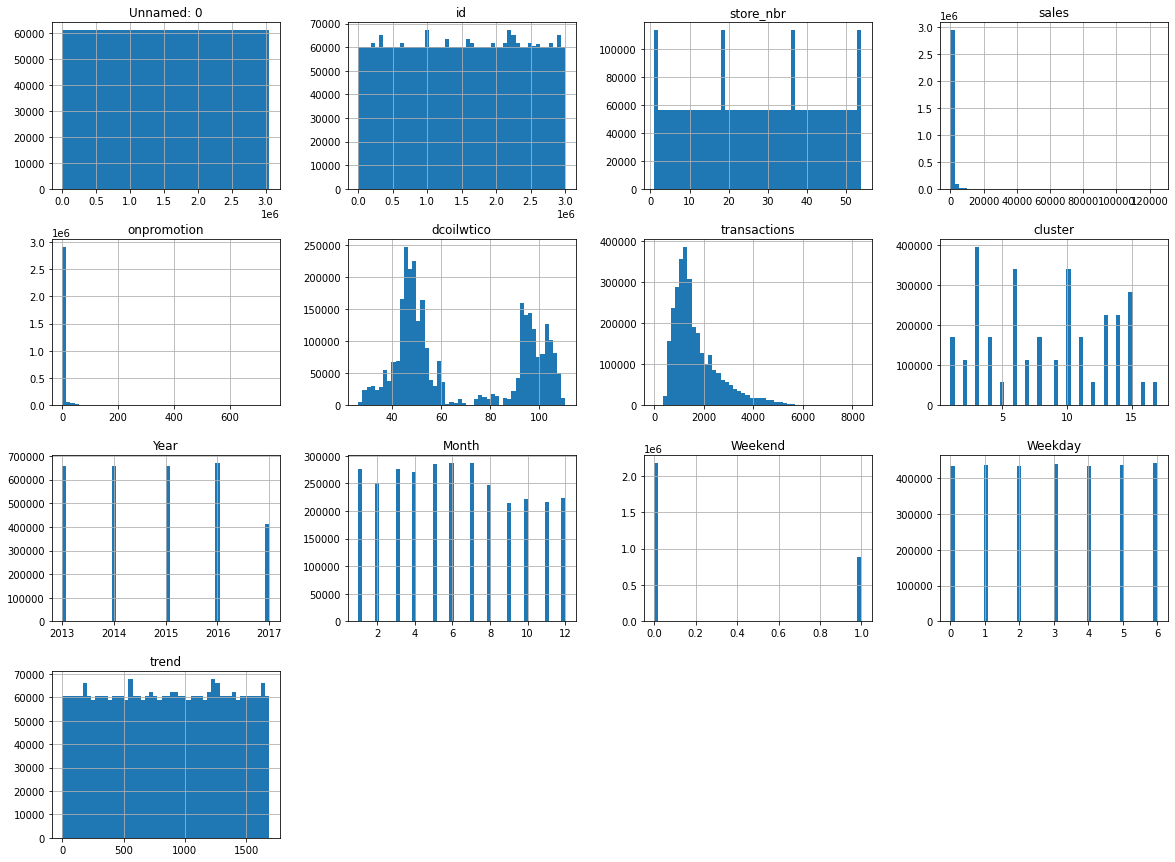

In [5]:
train_df.hist(bins=50, figsize=(20, 15))

In [6]:
print(train_df.info())
print(train_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 24 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   id            int64  
 2   date          object 
 3   store_nbr     int64  
 4   family        object 
 5   sales         float64
 6   onpromotion   int64  
 7   dcoilwtico    float64
 8   type_x        object 
 9   locale        object 
 10  locale_name   object 
 11  description   object 
 12  transferred   object 
 13  transactions  float64
 14  city          object 
 15  state         object 
 16  type_y        object 
 17  cluster       int64  
 18  Year          int64  
 19  Month         int64  
 20  Weekend       int64  
 21  Weekday       int64  
 22  trend         int64  
 23  NewYearsDay   bool   
dtypes: bool(1), float64(3), int64(10), object(10)
memory usage: 538.9+ MB
None
Index(['Unnamed: 0', 'id', 'date', 'store_nbr', 'family', 'sales',
       'onpromotion', 'dcoilwtico', 't

dcoilwtico,locale_name,description,city,state

In [7]:
train_df.drop(columns=['Unnamed: 0','locale_name','description','city','state'],inplace=True)
#Unnamed 불필요한 열
#locale_name description 명칭 등의 정보를 나타내므로 불필요
#city,state은 상점 정보와 cluster ,type등 다른 변수로 파악 가능하며 종류가 너무 다양함

In [8]:
test_df.drop(columns=['Unnamed: 0'],inplace=True)

#### 범주형 변수

family

In [9]:
train_df['family'].replace(['AUTOMOTIVE', 'HARDWARE', 'LAWN AND GARDEN', 'PLAYERS AND ELECTRONICS'], 'Tools', inplace = True)
train_df['family'].replace(['BEAUTY', 'LINGERIE', 'LADIESWEAR','PERSONAL CARE','CELEBRATION','MAGAZINES','BOOKS', 'BABY CARE'], 'LifeStyle', inplace = True)
train_df['family'].replace(['HOME APPLIANCES','HOME AND KITCHEN I', 'HOME AND KITCHEN II','HOME CARE','SCHOOL AND OFFICE SUPPLIES'], 'Home', inplace=True)
train_df['family'].replace([ 'GROCERY II', 'PET SUPPLIES','SEAFOOD','LIQUOR,WINE,BEER'], 'Food', inplace=True)
train_df['family'].replace(['DELI', 'EGGS'], 'Daily', inplace=True)

test_df['family'].replace(['AUTOMOTIVE', 'HARDWARE', 'LAWN AND GARDEN', 'PLAYERS AND ELECTRONICS'], 'Tools', inplace = True)
test_df['family'].replace(['BEAUTY', 'LINGERIE', 'LADIESWEAR','PERSONAL CARE','CELEBRATION','MAGAZINES','BOOKS', 'BABY CARE'], 'LifeStyle', inplace = True)
test_df['family'].replace(['HOME APPLIANCES','HOME AND KITCHEN I', 'HOME AND KITCHEN II','HOME CARE','SCHOOL AND OFFICE SUPPLIES'], 'Home', inplace=True)
test_df['family'].replace([ 'GROCERY II', 'PET SUPPLIES','SEAFOOD','LIQUOR,WINE,BEER'], 'Food', inplace=True)
test_df['family'].replace(['DELI', 'EGGS'], 'Daily', inplace=True)

print(train_df['family'].unique())

['Tools' 'LifeStyle' 'BEVERAGES' 'BREAD/BAKERY' 'CLEANING' 'DAIRY' 'Daily'
 'FROZEN FOODS' 'GROCERY I' 'Food' 'Home' 'MEATS' 'POULTRY'
 'PREPARED FOODS' 'PRODUCE']


In [10]:
train_df=pd.get_dummies(train_df,columns=['family'],drop_first=True)
train_df.head()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,type_x,locale,transferred,transactions,...,family_FROZEN FOODS,family_Food,family_GROCERY I,family_Home,family_LifeStyle,family_MEATS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_Tools
0,0,2013-01-01,1,0.0,0,93.14,Holiday,National,False,1420.876311,...,0,0,0,0,0,0,0,0,0,1
1,1,2013-01-01,1,0.0,0,93.14,Holiday,National,False,1420.876311,...,0,0,0,0,1,0,0,0,0,0
2,2,2013-01-01,1,0.0,0,93.14,Holiday,National,False,1420.876311,...,0,0,0,0,1,0,0,0,0,0
3,3,2013-01-01,1,0.0,0,93.14,Holiday,National,False,1420.876311,...,0,0,0,0,0,0,0,0,0,0
4,4,2013-01-01,1,0.0,0,93.14,Holiday,National,False,1420.876311,...,0,0,0,0,1,0,0,0,0,0


transferred

In [11]:
train_df['transferred'].value_counts()

Empty    2551824
False     453718
False      32768
True       16038
Name: transferred, dtype: int64

In [12]:
train_df[train_df.transferred == True]

,id,date,store_nbr,sales,onpromotion,dcoilwtico,type_x,locale,transferred,transactions,...,family_FROZEN FOODS,family_Food,family_GROCERY I,family_Home,family_LifeStyle,family_MEATS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_Tools


In [13]:
#train_df['holiday'] = ["0" if s == True else "1" for s in train_df['transferred']]
#train_df.drop(columns=['transferred'],inplace=True)
train_df.drop(columns=['type_x','locale'],inplace=True)
#type_x,locale 을 drop시키고 transferred가 true인 날만 평일로 구분하여 휴일과 평일 구분하려 했지만 transferred가 이상함


In [14]:
train_df['transferred'].replace(['True'], 0, inplace=True)
train_df['transferred'].replace(['False',False,'Empty'], 1, inplace=True)
train_df=train_df.rename(columns={'transferred':'holiday'})

type_y

In [15]:
train_df=pd.get_dummies(train_df,columns=['type_y'],drop_first=True)
train_df.head()
#A,B,C,D,E 가변수 변환

,id,date,store_nbr,sales,onpromotion,dcoilwtico,holiday,transactions,cluster,Year,...,family_LifeStyle,family_MEATS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_Tools,type_y_B,type_y_C,type_y_D,type_y_E
0,0,2013-01-01,1,0.0,0,93.14,1,1420.876311,13,2013,...,0,0,0,0,0,1,0,0,1,0
1,1,2013-01-01,1,0.0,0,93.14,1,1420.876311,13,2013,...,1,0,0,0,0,0,0,0,1,0
2,2,2013-01-01,1,0.0,0,93.14,1,1420.876311,13,2013,...,1,0,0,0,0,0,0,0,1,0
3,3,2013-01-01,1,0.0,0,93.14,1,1420.876311,13,2013,...,0,0,0,0,0,0,0,0,1,0
4,4,2013-01-01,1,0.0,0,93.14,1,1420.876311,13,2013,...,1,0,0,0,0,0,0,0,1,0


In [16]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 33 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     int64  
 1   date                   object 
 2   store_nbr              int64  
 3   sales                  float64
 4   onpromotion            int64  
 5   dcoilwtico             float64
 6   holiday                int64  
 7   transactions           float64
 8   cluster                int64  
 9   Year                   int64  
 10  Month                  int64  
 11  Weekend                int64  
 12  Weekday                int64  
 13  trend                  int64  
 14  NewYearsDay            bool   
 15  family_BREAD/BAKERY    uint8  
 16  family_CLEANING        uint8  
 17  family_DAIRY           uint8  
 18  family_Daily           uint8  
 19  family_FROZEN FOODS    uint8  
 20  family_Food            uint8  
 21  family_GROCERY I       uint8  
 22  family_Home       

In [17]:
train_df.drop(columns=['date'],inplace=True)

#### 연속형 변수

transaction,dcoilwtico

In [18]:
trans_df=train_df[['transactions','dcoilwtico']]

In [19]:
minmax_scaler=MinMaxScaler()
minmax_scaled=minmax_scaler.fit_transform(trans_df)

In [20]:
round(pd.DataFrame(minmax_scaled),2)

,0,1
0,0.17,0.79
1,0.17,0.79
2,0.17,0.79
3,0.17,0.79
4,0.17,0.79
...,...,...
3054343,0.26,0.25
3054344,0.26,0.25
3054345,0.26,0.25
3054346,0.26,0.25


In [21]:
trans_df=round(pd.DataFrame(minmax_scaled),2).loc[:,0]
#첫번째 정규화된 transaction 열만 추출

In [22]:
train_df.drop(columns=['dcoilwtico'],inplace=True)
#유가는 앞선 eda를 통해 상관관계가 없다는 것을 증명하였으므로 제거
train_df['transactions']=trans_df

In [23]:
train_df.head()

,id,store_nbr,sales,onpromotion,holiday,transactions,cluster,Year,Month,Weekend,...,family_LifeStyle,family_MEATS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_Tools,type_y_B,type_y_C,type_y_D,type_y_E
0,0,1,0.0,0,1,0.17,13,2013,1,0,...,0,0,0,0,0,1,0,0,1,0
1,1,1,0.0,0,1,0.17,13,2013,1,0,...,1,0,0,0,0,0,0,0,1,0
2,2,1,0.0,0,1,0.17,13,2013,1,0,...,1,0,0,0,0,0,0,0,1,0
3,3,1,0.0,0,1,0.17,13,2013,1,0,...,0,0,0,0,0,0,0,0,1,0
4,4,1,0.0,0,1,0.17,13,2013,1,0,...,1,0,0,0,0,0,0,0,1,0


#### Modelling

Linear regression

In [24]:
data=train_df.copy().drop(['id'],axis=1)
X=data.drop('sales',axis=1)
y=data['sales']

In [25]:
from sklearn.linear_model import LinearRegression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#이렇게 train_df에서 또 split을 하는게 맞나 모르겠음
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1234)

In [26]:
from sklearn.metrics import mean_squared_log_error
from plotly.subplots import make_subplots

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = np.where(y_pred<0, 0, y_pred)
print(np.sqrt(mean_squared_log_error(y_true=y_test, y_pred=y_pred)))

2.600050481182325


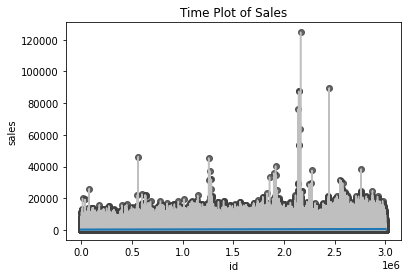

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot('id', 'sales', data=train_df, color='0.75')
ax = sns.regplot(x='id', y='sales', data=train_df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Sales');

Randomforest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor
from joblib import Parallel, delayed  
import warnings
from sklearn.linear_model import Ridge

In [29]:
RF = RandomForestRegressor(random_state=12, n_jobs=-1,max_depth=30, max_features='log2',max_leaf_nodes=20, verbose  =2)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
y_pred = np.where(y_pred<0, 0, y_pred)
np.sqrt(mean_squared_log_error(y_true=y_test, y_pred=y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100building tree 8 of 100

building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.5s


building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.8s finished


3.398205891745202

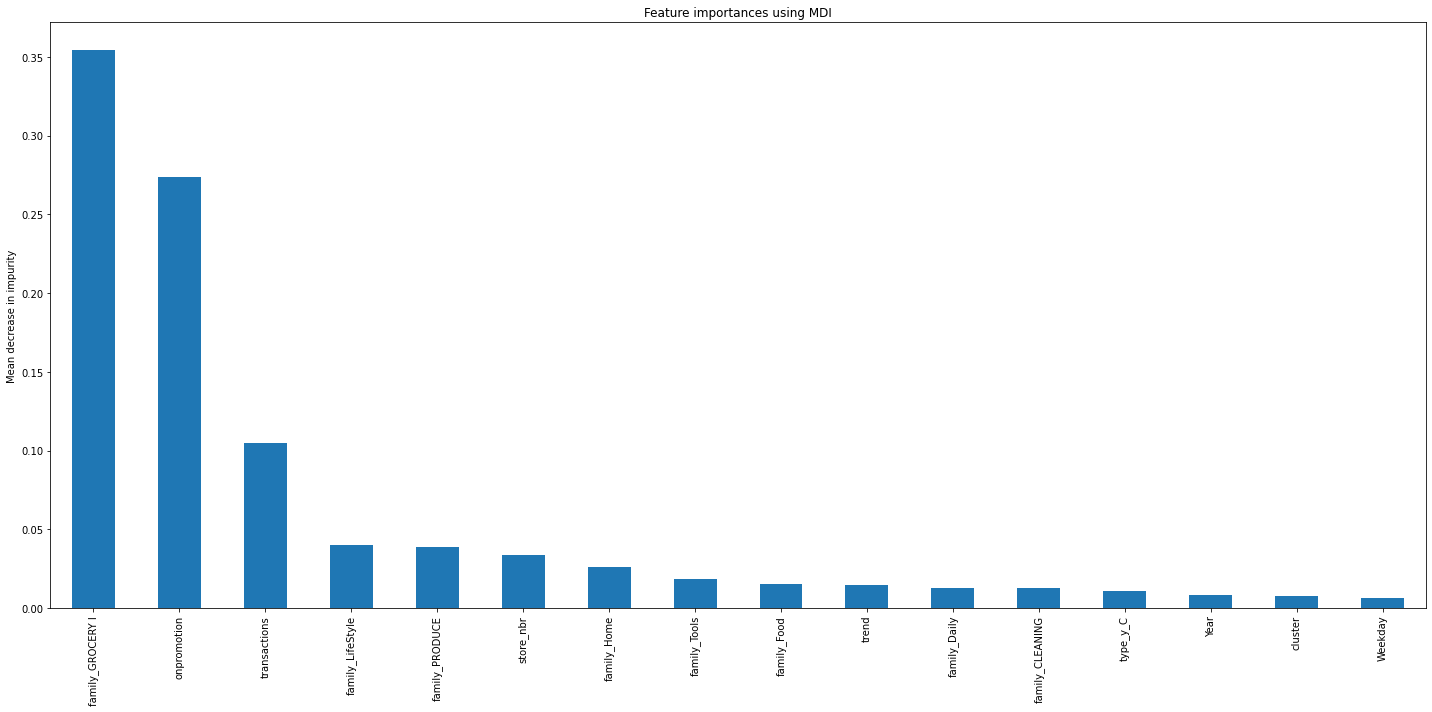

In [30]:
importances = np.array(RF.feature_importances_)
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)[:16]
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [31]:
#https://www.kaggle.com/julyantran/simple-mlp

In [ ]:
from sklearn.linear_model import LinearRegression

df = average_sales.to_frame()

time = np.arange(len(df.index))  # time dummy

df['time'] = time
#id

X = df.loc[:, ['time']]  # features
y = df.loc[:, 'sales']  # target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

q_3.check()

In [ ]:
ax = y.plot(**plot_params, alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Total Store Sales');

lag

In [ ]:
df = average_sales.to_frame()

lag_1 = df['sales'].shift(1)

df['lag_1'] = lag_1

X = df.loc[:, ['lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'sales']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

q_4.check()